Apa itu data cleansing?

Data cleansing adalah proses dari pemrosesan data yang berguna untuk membersihkan data dari nilai yang hilang, ataupun pencilan.

Regita ---> rambut panjang ---> P
Nina ---> rambut panjang ---> P
Chila ---> rambut panjang ---> P
Putri ---> rambut pendek ---> P

In [ ]:
Budi ---> rambut pendek ---> L
Tono ---> rambut pendek ---> L
Jeki ---> rambut pendek ---> L
Aldi ---> rambut pendek ---> L

In [ ]:
DINI ---> rambut pendek 

In [ ]:
#Regresi
prediksi harga saham ---> Rp 50000000
prediksi harga sepatu ---> Rp 2000000

In [ ]:
#klasifikasi
prediksi cuaca hari ini 1 ---> hujan, 2 ---> kemarau, 3 ---> salju
prediksi penyakit jantung 1 ---> jantung koroner, 2 ---> kanker jantung

Import Library

In [3]:
import pandas as pd
import numpy as np 

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


NAN, NULL, ___,--> missing value

Ketahui Kolomnya

1. ST_NUM: Street Number --> int/float
2. ST_NAME: Street Name --> STRING/OBJECT
3. OWN_OCCUPIED: Kepemilikan OCCUPIED --> OBJECT
4. NUM_BEDROOMS: Jumlah kamar --> int/float
5. NUM_BATH: Jumlah kamar mandi

Seleksi Kolom

In [8]:
df_used = df[["ST_NUM","ST_NAME","OWN_OCCUPIED","NUM_BEDROOMS","NUM_BATH"]]
df_used

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH
0,104.0,PUTNAM,Y,3,1
1,197.0,LEXINGTON,N,3,1.5
2,NaN,LEXINGTON,N,NaN,1
3,201.0,BERKELEY,12,1,NaN
4,203.0,BERKELEY,Y,3,2
5,207.0,BERKELEY,Y,NaN,1
6,NaN,WASHINGTON,NaN,2,HURLEY
7,213.0,TREMONT,Y,--,1
8,215.0,TREMONT,Y,na,2


In [9]:
df_used["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [12]:
df_used["ST_NUM"].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [15]:
df_used

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH
0,104.0,PUTNAM,Y,3,1
1,197.0,LEXINGTON,N,3,1.5
2,NaN,LEXINGTON,N,NaN,1
3,201.0,BERKELEY,12,1,NaN
4,203.0,BERKELEY,Y,3,2
5,207.0,BERKELEY,Y,NaN,1
6,NaN,WASHINGTON,NaN,2,HURLEY
7,213.0,TREMONT,Y,--,1
8,215.0,TREMONT,Y,na,2


In [14]:
df_used.isna().sum()

ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
dtype: int64

In [16]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ST_NUM        7 non-null      float64
 1   ST_NAME       9 non-null      object 
 2   OWN_OCCUPIED  8 non-null      object 
 3   NUM_BEDROOMS  7 non-null      object 
 4   NUM_BATH      8 non-null      object 
dtypes: float64(1), object(4)
memory usage: 492.0+ bytes


Bersihkan data 

Metode Pertama

In [17]:
filter_missing_value = ["na","--"]

In [31]:
df_used = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values= filter_missing_value)
df_used

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [32]:
df[["ST_NUM","ST_NAME","OWN_OCCUPIED","NUM_BEDROOMS","NUM_BATH"]]

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH
0,104.0,PUTNAM,Y,3,1
1,197.0,LEXINGTON,N,3,1.5
2,NaN,LEXINGTON,N,NaN,1
3,201.0,BERKELEY,12,1,NaN
4,203.0,BERKELEY,Y,3,2
5,207.0,BERKELEY,Y,NaN,1
6,NaN,WASHINGTON,NaN,2,HURLEY
7,213.0,TREMONT,Y,--,1
8,215.0,TREMONT,Y,na,2


Metode Kedua (pakai dropna) 

In [33]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values= filter_missing_value)

In [34]:
df_2 = df_2[["ST_NUM","ST_NAME","OWN_OCCUPIED","NUM_BEDROOMS","NUM_BATH"]]
df_2

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH
0,104.0,PUTNAM,Y,3.0,1
1,197.0,LEXINGTON,N,3.0,1.5
2,NaN,LEXINGTON,N,NaN,1
3,201.0,BERKELEY,12,1.0,NaN
4,203.0,BERKELEY,Y,3.0,2
5,207.0,BERKELEY,Y,NaN,1
6,NaN,WASHINGTON,NaN,2.0,HURLEY
7,213.0,TREMONT,Y,NaN,1
8,215.0,TREMONT,Y,NaN,2


In [35]:
df_2.isna().sum()

ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    4
NUM_BATH        1
dtype: int64

In [36]:
df_2.dropna(inplace=True)

In [37]:
df_2

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH
0,104.0,PUTNAM,Y,3.0,1
1,197.0,LEXINGTON,N,3.0,1.5
4,203.0,BERKELEY,Y,3.0,2


Menangani Missing Value dengan REPLACING

In [42]:
#df[kolom].fillna(value_diisi, inplace)
df_used["ST_NUM"].fillna(125, inplace=True)

In [43]:
df_used["ST_NUM"]

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [48]:
df_used["ST_NUM"].median()

201.0

In [49]:
df_used["ST_NUM"].mean()

176.66666666666666

In [50]:
df_used["ST_NUM"].mode()

0    125.0
Name: ST_NUM, dtype: float64

In [51]:
df_used

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [52]:
df_used["PID"].median()

100005000.0

In [81]:
df_used["PID"].fillna(df_used["PID"].median(), inplace=True)
df_used

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [64]:
c = df_used["PID"].median()

Praktik Data

In [6]:
data_jualan = pd.read_excel("data_penjualan-Copy.xlsx")
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak260,1000.0,1800.0,1800000.0
1,05/08/2022,FoodpakMatte245,1000.0,1900.0,1900000.0
2,05/08/2022,CraftLaminasi290,5000.0,750.0,3750000.0
3,05/08/2022,CraftLaminasi290,1000.0,1200.0,1200000.0
4,07/08/2022,Dupleks310,1000.0,1550.0,1550000.0
...,...,...,...,...,...
1071,14/11/2023,Ivory230,1000.0,900.0,900000.0
1072,15/11/2023,CraftLaminasi290,2000.0,800.0,1600000.0
1073,15/11/2023,CraftLaminasi290,1500.0,875.0,1312500.0
1074,15/11/2023,FoodpakMatte,1000.0,2200.0,2200000.0


In [14]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
data_jualan.isna().sum()

Tanggal          0
Jenis Produk    20
Jumlah Order    45
Harga           52
Total           54
dtype: int64

In [ ]:
#jenis produk---> mode()
#jumlah order --> mean()
#harga --------> mean()
#total --------> jumlah * harga

In [16]:
#jenis produk
data_jualan["Jenis Produk"].fillna(data_jualan["Jenis Produk"].mode()[0], inplace=True)

In [17]:
#jumlah order 
data_jualan["Jumlah Order"].fillna(data_jualan["Jumlah Order"].mean(), inplace=True)

In [19]:
#harga
data_jualan["Harga"].fillna(data_jualan["Harga"].mean(), inplace=True)

In [22]:
#total
data_jualan.loc[data_jualan["Total"].isna(), "Total"] = data_jualan["Jumlah Order"] * data_jualan["Harga"]

In [23]:
data_jualan.isna().sum()

Tanggal         0
Jenis Produk    0
Jumlah Order    0
Harga           0
Total           0
dtype: int64

In [26]:
data_jualan["Total"].iloc[29]

2200000.0

In [30]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Matplotlib

In [28]:
import matplotlib.pyplot as plt

Visualisasi jumlah order per produk dengan BARCHART

In [35]:
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tanggal       1076 non-null   object 
 1   Jenis Produk  1076 non-null   object 
 2   Jumlah Order  1076 non-null   float64
 3   Harga         1076 non-null   float64
 4   Total         1076 non-null   float64
dtypes: float64(3), object(2)
memory usage: 42.2+ KB


In [38]:
data_jualan["Jenis Produk"] = data_jualan["Jenis Produk"].astype(str)
data_jualan["Jumlah Order"] = data_jualan["Jumlah Order"].astype(float)

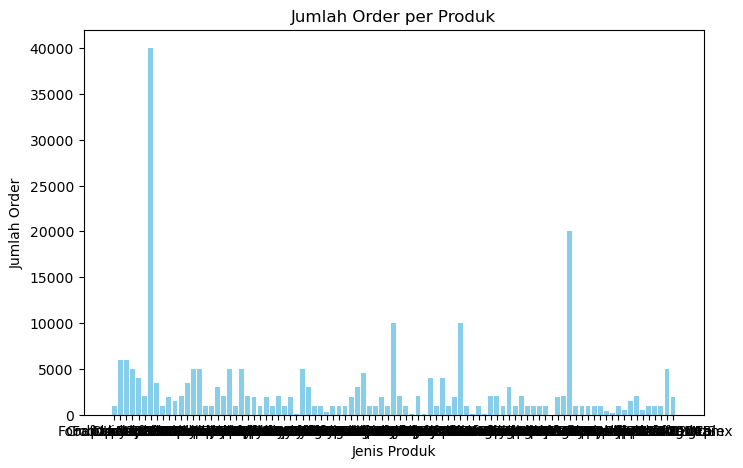

In [49]:
plt.figure(figsize=(8,5))
plt.bar(data_jualan["Jenis Produk"], data_jualan["Jumlah Order"], color="skyblue")
plt.title("Jumlah Order per Produk")
plt.xlabel("Jenis Produk")
plt.ylabel("Jumlah Order")
plt.show()

In [42]:
top_10_produk = data_jualan.nlargest(10, "Jumlah Order")
top_10_produk

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
431,21/02/2023,HVS,40000.0,250.0,10000000.0
62,03/09/2022,HVS,20000.0,250.0,5000000.0
128,07/10/2022,HVS,20000.0,250.0,5000000.0
197,20/11/2022,HVS,20000.0,250.0,5000000.0
256,07/12/2022,HVS,20000.0,250.0,5000000.0
345,06/01/2023,HVS,20000.0,250.0,5000000.0
547,29/04/2023,HVS,20000.0,250.0,5000000.0
684,26/06/2023,HVS,20000.0,250.0,5000000.0
742,19/07/2023,HVSHIJAU,20000.0,250.0,5000000.0
850,24/08/2023,HVS,20000.0,250.0,5000000.0


In [44]:
top_10_produk_kecil = data_jualan.nsmallest(10, "Jumlah Order")
top_10_produk_kecil

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
740,17/07/2023,KertasStiker,5.0,15000.0,75000.0
882,02/09/2023,KertasStiker,5.0,15000.0,75000.0
931,22/09/2023,KertasStikerA3,5.0,15000.0,75000.0
729,14/07/2023,KertasStiker,6.0,15000.0,90000.0
649,12/06/2023,StikerKertas,8.0,15000.0,120000.0
650,12/06/2023,StikerKertas,20.0,15000.0,300000.0
414,13/02/2023,KertasFolio,50.0,12000.0,600000.0
923,19/09/2023,NCR,50.0,12000.0,600000.0
158,24/10/2022,PTSariIndahPackagingIndustry,100.0,3500.0,350000.0
288,15/12/2022,PTSARIINDAH,100.0,3000.0,300000.0


([0, 1], [Text(0, 0, 'HVS'), Text(1, 0, 'HVSHIJAU')])

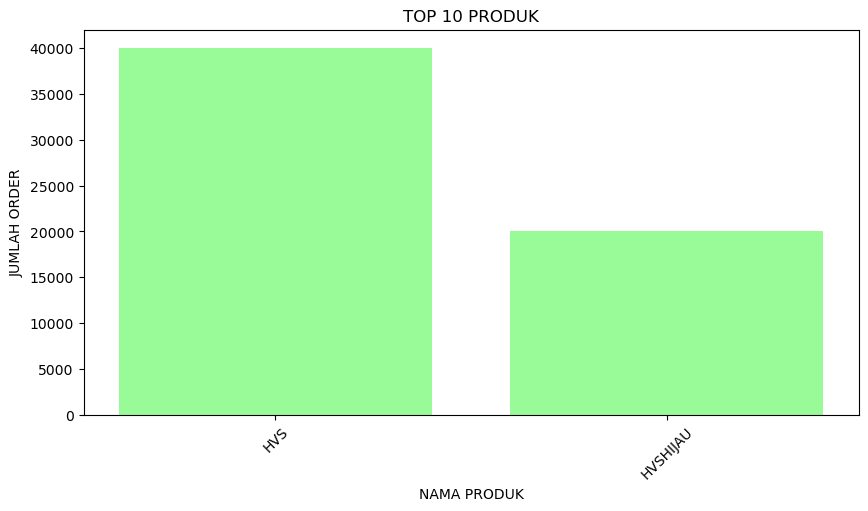

In [70]:
plt.figure(figsize=(10,5))
plt.bar(top_10_produk["Jenis Produk"],top_10_produk["Jumlah Order"], color="palegreen")
plt.title("TOP 10 PRODUK")
plt.xlabel("NAMA PRODUK")
plt.ylabel("JUMLAH ORDER")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'KertasStiker'),
  Text(1, 0, 'KertasStikerA3'),
  Text(2, 0, 'StikerKertas'),
  Text(3, 0, 'KertasFolio'),
  Text(4, 0, 'NCR'),
  Text(5, 0, 'PTSariIndahPackagingIndustry'),
  Text(6, 0, 'PTSARIINDAH')])

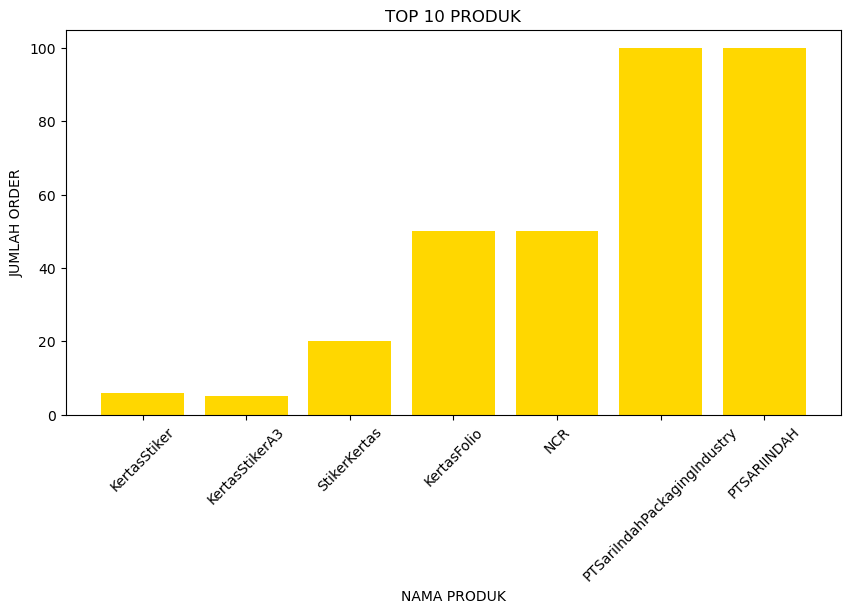

In [73]:
plt.figure(figsize=(10,5))
plt.bar(top_10_produk_kecil["Jenis Produk"],top_10_produk_kecil["Jumlah Order"], color="gold")
plt.title("TOP 10 PRODUK")
plt.xlabel("NAMA PRODUK")
plt.ylabel("JUMLAH ORDER")
plt.xticks(rotation=45)

#penugasan
1. Analisa Penjualan setiap bulan dari produk kalian ---> Jumlah penjualan setiap bulan
2. Visualisasikan pendapatan tertinggi setiap bulannya, hitung total pendapatan produk setiap bulan ---> list,
   {"Januari": 20000; "Februari": 30000} ---> visualisasikan

3. Kasih legenda setiap visualisasi


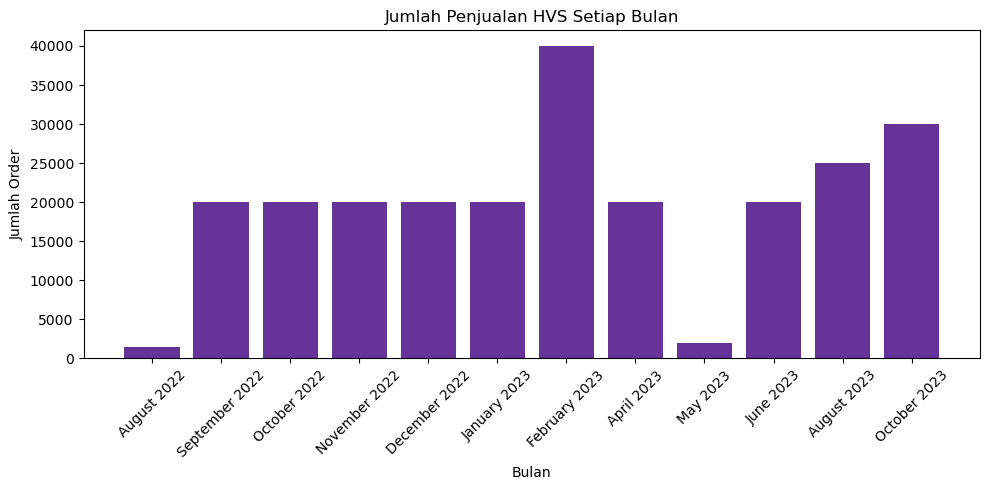

In [69]:
#1
data_hvs = data_jualan[data_jualan["Jenis Produk"]== "HVS"]
data_jualan["Tanggal"] = pd.to_datetime(data_jualan["Tanggal"], dayfirst=True)
data_hvs["bulan"] = data_hvs["Tanggal"].dt.to_period("M")
penjualan_perbulan = data_hvs.groupby("bulan")["Jumlah Order"].sum()
nama_bulan = penjualan_perbulan.index.strftime("%B %Y")
plt.figure(figsize=(10,5))
plt.bar(nama_bulan, penjualan_perbulan.values, color="rebeccapurple")
plt.title("Jumlah Penjualan HVS Setiap Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Order")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

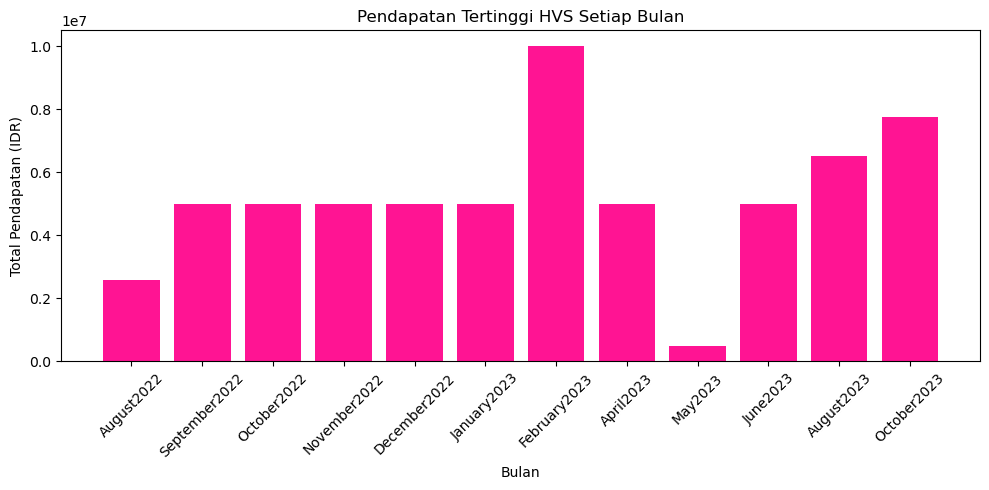

In [74]:
#2
data_jualan["Tanggal"] = pd.to_datetime(data_jualan["Tanggal"], dayfirst=True)
data_hvs = data_jualan[data_jualan["Jenis Produk"]== "HVS"]
data_hvs["bulan"] = data_hvs["Tanggal"].dt.to_period("M")
data_hvs["pendapatan"] = data_hvs["Jumlah Order"] * data_hvs["Harga"]
pendapatan_perbulan = data_hvs.groupby("bulan")["pendapatan"].sum()
nama_bulan = pendapatan_perbulan.index.strftime("%B%Y")
plt.figure(figsize=(10,5))
plt.bar(nama_bulan, pendapatan_perbulan.values, color="deeppink")
plt.title("Pendapatan Tertinggi HVS Setiap Bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Pendapatan (IDR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

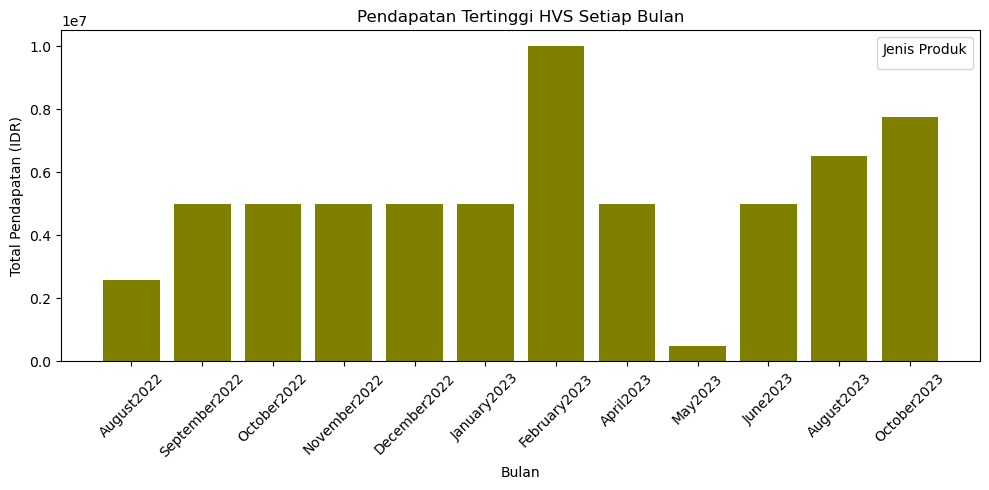

In [76]:
#3
data_jualan["Tanggal"] = pd.to_datetime(data_jualan["Tanggal"], dayfirst=True)
data_hvs = data_jualan[data_jualan["Jenis Produk"]== "HVS"]
data_hvs["bulan"] = data_hvs["Tanggal"].dt.to_period("M")
data_hvs["pendapatan"] = data_hvs["Jumlah Order"] * data_hvs["Harga"]
pendapatan_perbulan = data_hvs.groupby("bulan")["pendapatan"].sum()
nama_bulan = pendapatan_perbulan.index.strftime("%B%Y")
plt.figure(figsize=(10,5))
plt.bar(nama_bulan, pendapatan_perbulan.values, color="olive")
plt.title("Pendapatan Tertinggi HVS Setiap Bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Pendapatan (IDR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Jenis Produk")
plt.show()